In [1]:
import matplotlib.pyplot as plt

data.iloc[:5, :5]

,order_id,order_status,customer,order_date,order_quantity
0,28774,Order Finished,Jessica Myrick,2009-01-01,32
1,9285,Order Finished,David Philippe,2009-01-02,3
2,37537,Order Finished,Alan Schoenberger,2009-01-02,4
3,44069,Order Finished,Elizabeth Moffitt,2009-01-02,16
4,7909,Order Finished,Alex Russell,2009-01-03,29


In [2]:
data.iloc[:5, 5:]

,sales,discount,discount_value,product_category,product_sub_category
0,360720,0.10,36072,Office Supplies,Storage & Organization
1,249620,0.06,14977,Office Supplies,Binders & Binder Accessories
2,2478120,0.00,0,Furniture,Chairs & Chairmats
3,275260,0.09,24773,Office Supplies,Paper
4,244460,0.03,7334,Office Supplies,Pens & Art Supplies


### ```General Understanding```

In [3]:
tahun = data["order_date"].dt.year

#### ```Total Sales Yearly```

In [4]:
yearly = data.groupby(tahun)[["sales"]].sum()

yearly

,sales
order_date,
2009,4613872681
2010,4059100607
2011,4112036186
2012,4482983158


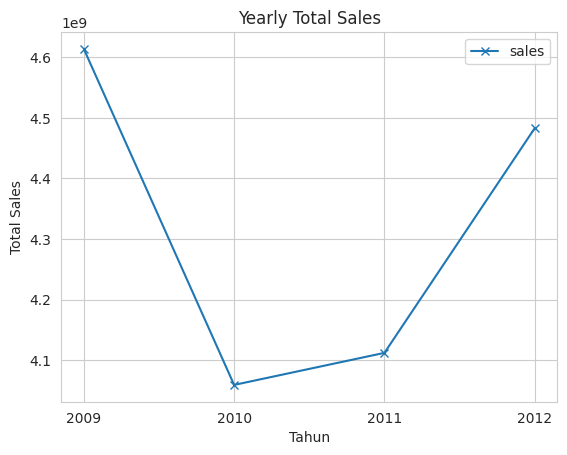

In [5]:
title = "Yearly Total Sales"

plot = yearly.plot.line(title=title, marker="x")

plot.set_xlabel("Tahun")

plot.set_ylabel("Total Sales")

plot.set_xticks(tahun.unique().tolist());

#### ```Yearly Total Sales Diff```

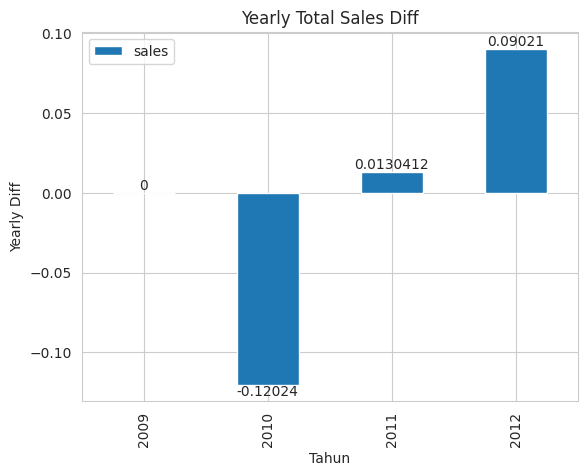

In [6]:
yearlypct = yearly.pct_change()

title = "Yearly Total Sales Diff"

plot = yearlypct.plot.bar(title=title)

plot.set_xlabel("Tahun")

plot.set_ylabel("Yearly Diff")

plot.bar_label(plot.containers[0]);

#### ```Total Customer Yearly```

In [7]:
yearly = data.groupby(tahun)[["customer"]].count()

yearly

,customer
order_date,
2009,1244
2010,1248
2011,1178
2012,1254


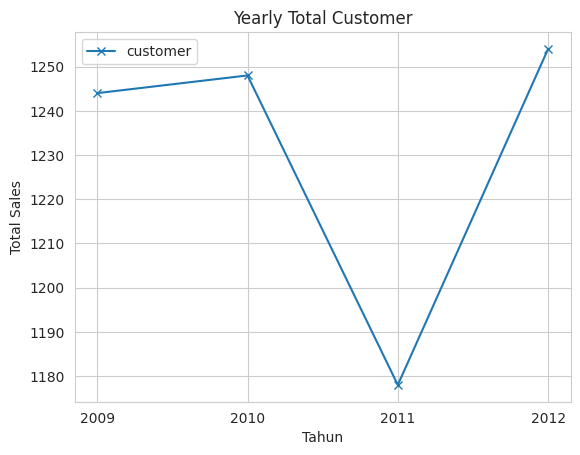

In [8]:
title = "Yearly Total Customer"

plot = yearly.plot.line(title=title, marker="x")

plot.set_xlabel("Tahun")

plot.set_ylabel("Total Sales")

plot.set_xticks(tahun.unique().tolist());

#### ```Total Burn Ratio Yearly```

In [9]:
ratio = lambda data, i, j : np.divide(data[i], data[j]) * 100

In [10]:
yearly = data.groupby(tahun)[["discount_value", "sales"]].sum()

yearly.columns = ["discount", "sales"]

yearly["ratio"] = ratio(yearly, "discount", "sales")

yearly

,discount,sales,ratio
order_date,,,
2009,214330327,4613872681,4.645346
2010,197506939,4059100607,4.865781
2011,214611556,4112036186,5.219107
2012,225867642,4482983158,5.038333


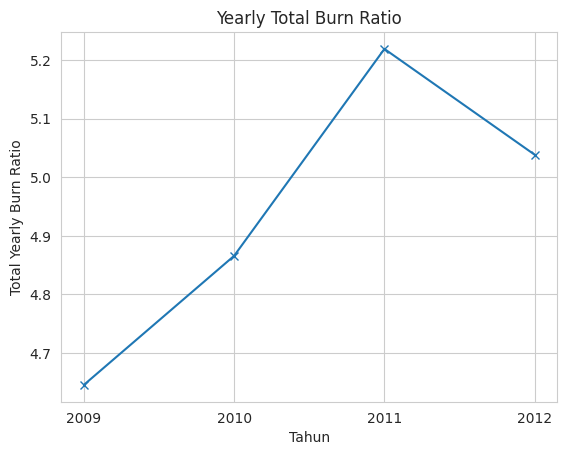

In [11]:
plot = yearly["ratio"].plot.line(title="Yearly Total Burn Ratio", marker="x")

plot.set_xlabel("Tahun")

plot.set_ylabel("Total Yearly Burn Ratio")

plot.set_xticks(tahun.unique().tolist());


### ```Customer Understanding```

#### ```Most Valuable Customer```

In [12]:
customer = data.groupby("customer")[["sales"]].sum()

customer = customer.sort_values("sales")

customer.tail()

,sales
customer,
Christina Vanderzanden,143127604
Bill Donatelli,147102789
Sylvia Foulston,155672633
Deborah Brumfield,182192930
Emily Phan,220589920


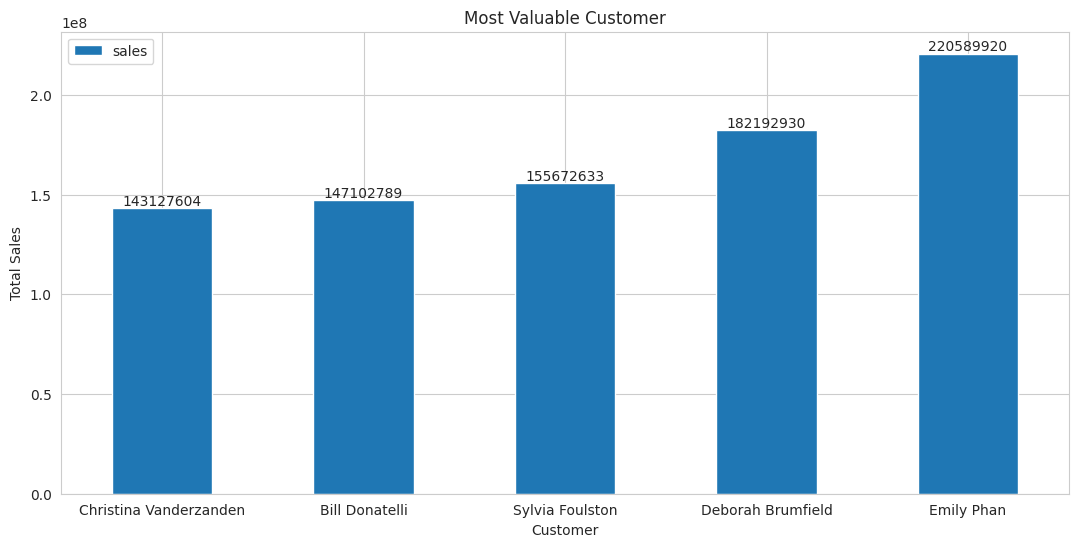

In [13]:
lower = customer.tail()

plot = lower.plot.bar(title="Most Valuable Customer", rot=0, figsize=(13, 6))

plot.set_ylabel("Total Sales")

plot.set_xlabel("Customer")

plot.bar_label(plot.containers[0], fmt="%d");

#### ```Yearly New Customer```

In [14]:
customer = data.groupby("customer")[["order_date"]].min()

tahun = customer.order_date.dt.year

yearly = customer.groupby(tahun).count()

yearly

,order_date
order_date,
2009,585
2010,141
2011,38
2012,11


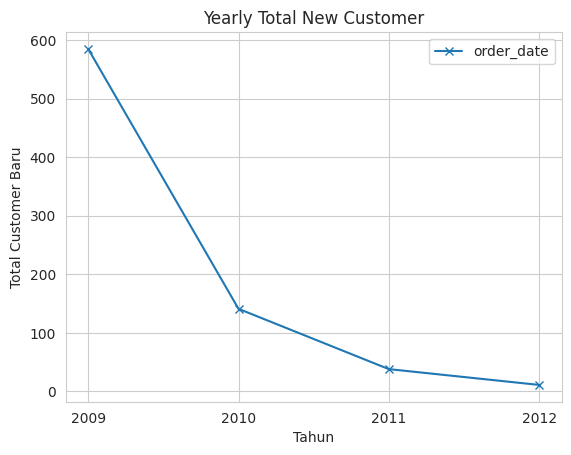

In [15]:
plot = yearly.plot.line(title="Yearly Total New Customer", marker="x")

plot.set_xlabel("Tahun")

plot.set_ylabel("Total Customer Baru")

plot.set_xticks(tahun.unique().tolist());

### ```Category Understanding```

In [16]:
category = data.groupby("product_category")[["sales"]].sum()

category

,sales
product_category,
Furniture,5940483260
Office Supplies,4685571420
Technology,6641937952


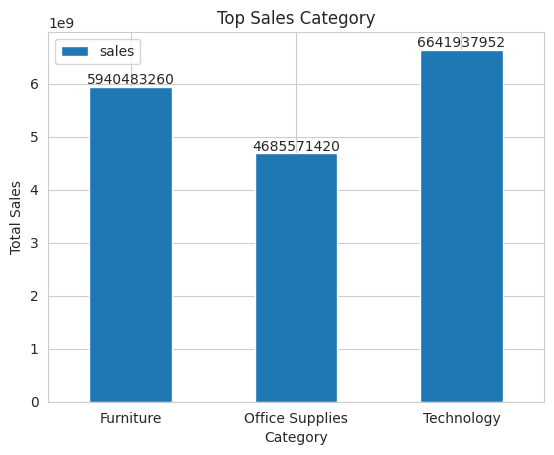

In [17]:
title = "Top Sales Category"

plot = category.plot.bar(title=title, rot=0)

plot.set_ylabel("Total Sales")

plot.set_xlabel("Category")

plot.bar_label(plot.containers[0], fmt="%d");

In [18]:
tahun = data["order_date"].dt.year

category = data.groupby(["product_category", tahun])[["sales"]].sum()

category

sales
product_category order_date            
Furniture        2009        1745027412
                 2010        1354767316
                 2011        1458613848
                 2012        1382074684
Office Supplies  2009        1226286860
                 2010        1113975520
                 2011        1078619360
                 2012        1266689680
Technology       2009        1642558409
                 2010        1590357771
                 2011        1574802978
                 2012        1834218794